In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from wmb_browser.backend.dataset import Dataset
from wmb_browser.backend.cemba_cell import cemba_cell
from wmb_browser.backend.genome import mm10
from wmb_browser.backend.colors import color_collection

import joblib
import pandas as pd
import xarray as xr
import plotly.express as px

In [2]:
fig = cemba_cell.categorical_scatter_figure('l1_tsne', 'CellSubClass')

In [10]:
cemba_cell.metadata_names

{'CEMBARegion',
 'CellClass',
 'CellGroup',
 'CellSubClass',
 'Col384',
 'DissectionRegion',
 'FinalmCReads',
 'InputReads',
 'IntID',
 'MajorRegion',
 'Plate',
 'PlateNormCov',
 'Row384',
 'Sample',
 'Slice',
 'SubRegion',
 'Technology',
 'mCCCFrac',
 'mCGFrac',
 'mCHFrac'}

In [11]:
cell_id = cemba_cell._int_id_to_original_id[269126]
cemba_cell.get_metadata('CellSubClass').loc[cell_id]

'PG-TRN-LRN Fat2 Glut'

In [6]:
cell_int_id = cemba_cell.get_metadata('IntID')

In [7]:
cell_int_id

cell
10A_M_1            0
10A_M_100          1
10A_M_1000         2
10A_M_1001         3
10A_M_1002         4
               ...  
17A_M_3051    301621
17A_M_3052    301622
17A_M_3053    301623
17A_M_3054    301624
17A_M_3055    301625
Name: IntID, Length: 301626, dtype: uint32

In [6]:
df = cemba_cell.get_plot_data('slice17_merfish', 'MajorRegion')

In [8]:
df.sort_values('MajorRegion')

,slice17_merfish_0,slice17_merfish_1,MajorRegion
1B_M_2633,-1.962891,0.287842,Isocortex
1B_M_1083,-0.512207,2.044922,Isocortex
1A_M_2205,-1.237305,0.857422,Isocortex
1A_M_2343,1.365234,2.095703,Isocortex
1B_M_953,-1.638672,0.619141,Isocortex
...,...,...,...
1C_M_2256,-1.212891,-0.981445,OLF
1C_M_2233,1.227539,-0.748047,OLF
1C_M_2196,-1.441406,-0.800781,OLF
1C_M_1018,-1.166016,-1.340820,OLF


In [ ]:
fig = px.scatter(plot_data, 
                 x='mr_tsne_0', 
                 y='mr_tsne_1', 
                 color='gene_mch:Gad1', 
                 hover_data=['gene_mch:Gad1', 'CellSubClass'],
                 color_continuous_scale='viridis',
                 range_color=(0.5, 2)
                )
fig.layout.width = 820
fig.layout.height = 800

fig.update_traces(marker=dict(size=10))
fig.update_traces(hovertemplate='Gad1 mCH = %{marker.color:.2f}<br>Cell SubClass = %{customdata[1]}<extra></extra>')
fig.update_layout(coloraxis_colorbar=dict(thickness=20, len=0.5, y=0.5, title=None))

fig.show()

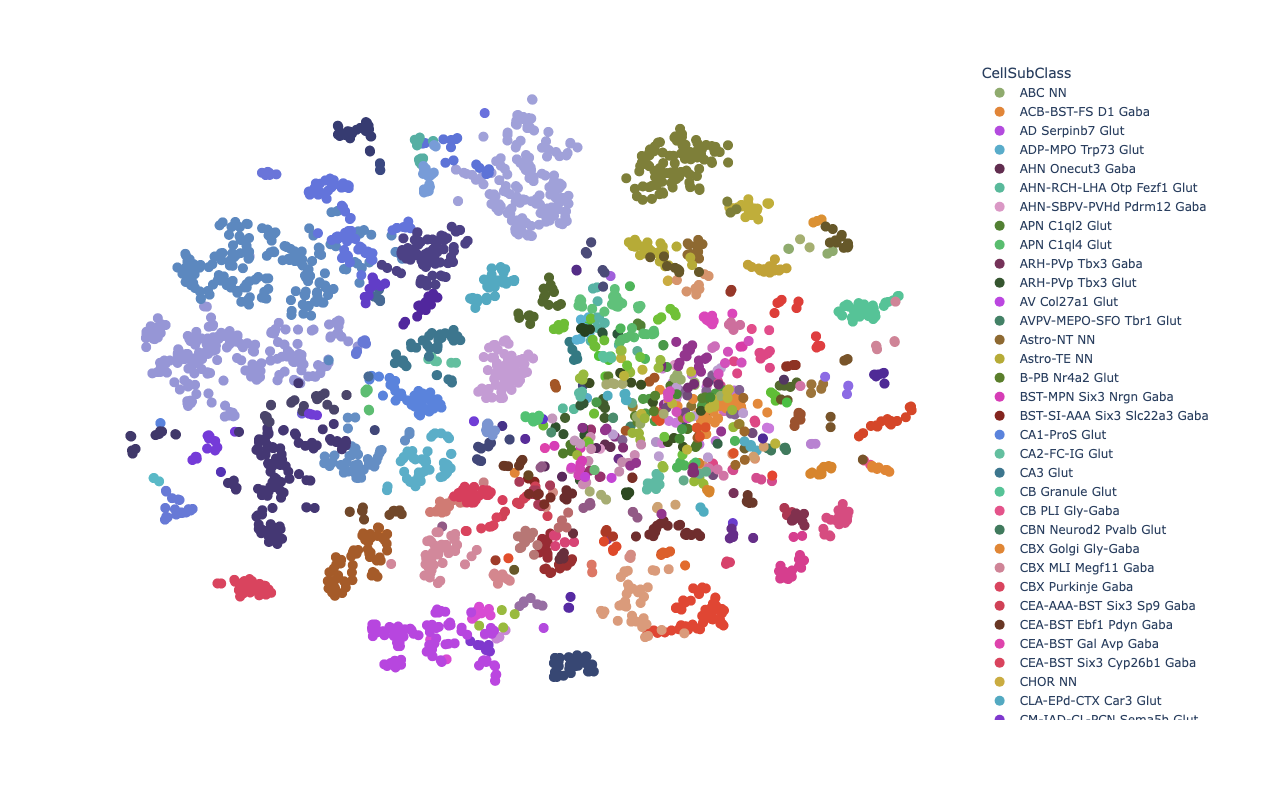

In [35]:
fig = px.scatter(plot_data.sort_values('CellSubClass'), 
                 x='l1_tsne_0', 
                 y='l1_tsne_1', 
                 color='CellSubClass', 
                 hover_data=['gene_mch:ENSMUSG00000070880', 'CellSubClass'],
                 color_discrete_map=p
                )
fig.layout.width = 820
fig.layout.height = 800

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(itemwidth=30)
)

fig.update_traces(marker=dict(size=10))
fig.update_traces(hovertemplate='Gad1 mCH = %{customdata[0]}<br>Cell SubClass = %{customdata[1]}<extra></extra>')

fig.show()

In [20]:
palette = color.get_colors('subclass')
cats = plot_data['CellSubClass'].unique()
use_palettes = {k: v for k, v in palette.items() if k in cats}
missing_color='#D3D3D3'

for cat in cats:
    if cat not in use_palettes:
        use_palettes[cat] = missing_color
        print(cat)

In [23]:
plot_data['CellSubClass'] = plot_data['CellSubClass'].astype(str)

In [3]:
color_collection.palette_names

['cemba_dissection_region', 'cemba_sub_region', 'subclass']

In [4]:
color_collection.get_colors('subclass')

{'ABC NN': '#8fab6e',
 'ACB-BST-FS D1 Gaba': '#e18538',
 'AD Serpinb7 Glut': '#b34ade',
 'ADP-MPO Trp73 Glut': '#59acca',
 'AHN Onecut3 Gaba': '#612d4f',
 'AHN-RCH-LHA Otp Fezf1 Glut': '#59b99b',
 'AHN-SBPV-PVHd Pdrm12 Gaba': '#da98c5',
 'APN C1ql2 Glut': '#528033',
 'APN C1ql4 Glut': '#59bd6f',
 'ARH-PVi Six6 Dopa-Gaba': '#cc4ad8',
 'ARH-PVp Tbx3 Gaba': '#753259',
 'ARH-PVp Tbx3 Glut': '#35552f',
 'AV Col27a1 Glut': '#bb46e0',
 'AVPV-MEPO-SFO Tbr1 Glut': '#438166',
 'Astro-CB NN': '#b5a06a',
 'Astro-NT NN': '#8e6931',
 'Astro-OLF NN': '#a3b178',
 'Astro-TE NN': '#b6ab37',
 'Astroependymal NN': '#c7a73b',
 'B-PB Nr4a2 Glut': '#5a7e2b',
 'BAM NN': '#c3a538',
 'BST Tac2 Gaba': '#ce89ad',
 'BST-MPN Six3 Nrgn Gaba': '#d63db6',
 'BST-SI-AAA Six3 Slc22a3 Gaba': '#84251f',
 'BST-po Iigp1 Glut': '#be96cb',
 'Bergmann NN': '#806d2a',
 'CA1-ProS Glut': '#5a83dc',
 'CA2-FC-IG Glut': '#63bf9f',
 'CA3 Glut': '#3d768e',
 'CB Granule Glut': '#56c397',
 'CB PLI Gly-Gaba': '#e4538a',
 'CBN Dmbx1 Gaba':